# Impact of aerosols on SED

Study the impact of aerosols

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import os
import sys

In [24]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [25]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [26]:
sys.path.append('../../libradtransim')
sys.path.append('../../LSSTFiltersKG')
sys.path.append('../../lsstphotometry')
sys.path.append('../../pysynphotsed')

In [27]:
import libsimulateTranspLSSTScattAbsAer as atm
import libLSSTFiltersKG as lsst
import libLSSTPhotometry as photo
import libpysynphotsed as sed

In [28]:
import astropy
import astropy.units as u
from astropy.io import fits

In [29]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

# LSST Telescope

In [30]:
LSST_COLL_SURF=35*(u.m)**2/(u.cm)**2  # LSST collectif surface
WLMIN=3000.
WLMAX=11000.

In [31]:
NBINS=100000
BinWidth=(WLMAX-WLMIN)/float(NBINS)
WL=np.linspace(WLMIN,WLMAX,NBINS)

In [32]:
LSST_COLL_SURF.decompose()

<Quantity 350000.0>

In [33]:
S.refs.setref(area=LSST_COLL_SURF.decompose(), waveset=None)

In [34]:
S.refs.set_default_waveset(minwave=3000, maxwave=11000, num=8000, delta=1, log=False)

In [35]:
S.refs.showref()

thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 3000, Max: 11000, Num: None, Delta: 1, Log: False
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/0ac1951am_tmc.fits
graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/0bf2050hm_tmg.fits
      area: 350000.0


# Retrieve SED

In [36]:
all_sed=sed.get_all_ck04models()

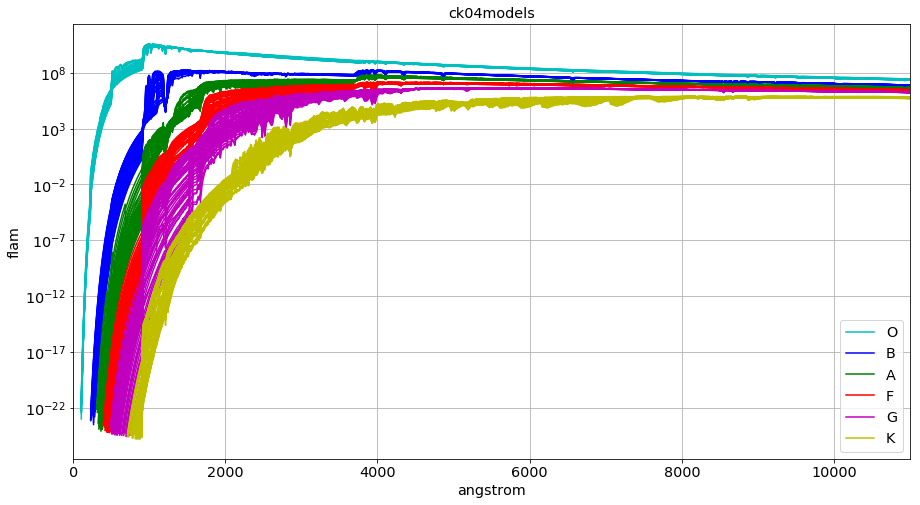

In [37]:
sed.plot_allsed(all_sed,"ck04models","ck04models.png")

In [38]:
NBSEDCOLORS=len(all_sed)

# Retrieve Filters

In [39]:
bp_u,bp_g,bp_r,bp_i,bp_z,bp_y4=lsst.GetAllLSSTBands('../..')

In [40]:
#lsst.PlotAllLSSTBands(bp_u,bp_g,bp_r,bp_i,bp_z,bp_y4)